In [1]:
#import the pandas library

import pandas as pd

The data we wish to analyze is in the file stats-experiment-2.txt. Note that the file is currently in the data directory. This can be seen by listing (ls) the contents of the data directory.

In [2]:
ls ../data

Analyzing-Infrastructure-Data-part-1.ipynb  stats-experiment-1.txt
Analyzing-Infrastructure-Data-part-2.ipynb  stats-experiment-2.txt
features_1.npy                              target_1.npy
features_2.npy                              target_2.npy
features_3.npy                              target_3.npy
features_4.npy                              target_4.npy
features_5.npy                              target_5.npy
features_6.npy                              target_6.npy
features_7.npy                              target_7.npy
features_8.npy                              target_8.npy
satisfaction.txt                            userdata1.parquet


Next, we display a few lines from this file using the `head` command.

In [3]:
!head ../data/stats-experiment-2.txt

db8e4e8824c5	0.07%	451.4MiB / 983.9MiB
db8e4e8824c5	0.03%	451.4MiB / 983.9MiB
db8e4e8824c5	0.03%	451.4MiB / 983.9MiB
db8e4e8824c5	0.03%	451.4MiB / 983.9MiB
db8e4e8824c5	0.01%	451.4MiB / 983.9MiB
db8e4e8824c5	0.01%	451.4MiB / 983.9MiB
db8e4e8824c5	0.01%	451.4MiB / 983.9MiB
db8e4e8824c5	0.01%	451.4MiB / 983.9MiB
db8e4e8824c5	0.03%	451.4MiB / 983.9MiB
db8e4e8824c5	0.03%	451.4MiB / 983.9MiB


From this output, we can infer that the data is separated using a tab (`\t`)character and that the file has no header row. These arguments are passed to the CSV reader when we read the file.

In [4]:
stats_exp_2 = pd.read_csv("../data/stats-experiment-2.txt", 
                          sep="\t", 
                          header=None)

In this step, we tell `pandas` what names we would like to use for each column.

In [5]:
stats_exp_2.columns = ["container", "cpu_usage", "ram_usage"]

Here, we display the head of the `DataFrame` that was generated by the `pandas` CSV reader.

In [6]:
stats_exp_2.head()

,container,cpu_usage,ram_usage
0,[2J[Hdb8e4e8824c5,0.07%,451.4MiB / 983.9MiB
1,[2J[Hdb8e4e8824c5,0.03%,451.4MiB / 983.9MiB
2,[2J[Hdb8e4e8824c5,0.03%,451.4MiB / 983.9MiB
3,[2J[Hdb8e4e8824c5,0.03%,451.4MiB / 983.9MiB
4,[2J[Hdb8e4e8824c5,0.01%,451.4MiB / 983.9MiB


One issue we can make note of is that each of the values for `cpu_usage` contains the percent (`%`) symbol. In the next step, we use `.apply()` to remove this symbol.

In [7]:
stats_exp_2["cpu_usage"] = stats_exp_2["cpu_usage"].apply(lambda x: x.replace("%", ""))

In the next step we use a named function, remove_MiBS, To keep only the raw ram_usage number from the third column.

In [8]:
def remove_MiBS(value):
    return value.replace("MiB / 983.9MiB", "")

Here, we demonstrate how this function works by passing a sample string that resembles the data in the `raw_usage` column.

In [9]:
remove_MiBS("106.7MiB / 983.9MiB")

'106.7'

Having confirms it works properly, we apply the named function `remove_MiBS` to the `ram_usage` column.

In [10]:
stats_exp_2["ram_usage"] = stats_exp_2["ram_usage"].apply(remove_MiBS)

Once more, we display the head of the `DataFrame`.

In [11]:
stats_exp_2.head()

,container,cpu_usage,ram_usage
0,[2J[Hdb8e4e8824c5,0.07,451.4
1,[2J[Hdb8e4e8824c5,0.03,451.4
2,[2J[Hdb8e4e8824c5,0.03,451.4
3,[2J[Hdb8e4e8824c5,0.03,451.4
4,[2J[Hdb8e4e8824c5,0.01,451.4


There is still another issue with our data. The issue is that our data is currently stored as `object` type data.

In [13]:
stats_exp_2.dtypes

container    object
cpu_usage    object
ram_usage    object
dtype: object

Here, we correctly cast the data type of the final two columns to be floating-point numbers.

In [14]:
stats_exp_2["cpu_usage"] = stats_exp_2["cpu_usage"].astype(float)
stats_exp_2["ram_usage"] = stats_exp_2["ram_usage"].astype(float)

Next, let's look at the `.dtypes` to confirm that it worked correctly.

In [15]:
stats_exp_2.dtypes

container     object
cpu_usage    float64
ram_usage    float64
dtype: object

In order to prepare the data for a nice plot we will use a time index for the DataFrames index. The time unit for this analysis is arbitrary and we will use seconds (unit="s").

In [17]:
stats_exp_2.index = pd.TimedeltaIndex(data=stats_exp_2.index, unit="s")

Once more, display the `.head()`.

In [18]:
stats_exp_2.head()

,container,cpu_usage,ram_usage
00:00:00,[2J[Hdb8e4e8824c5,0.07,451.4
00:00:01,[2J[Hdb8e4e8824c5,0.03,451.4
00:00:02,[2J[Hdb8e4e8824c5,0.03,451.4
00:00:03,[2J[Hdb8e4e8824c5,0.03,451.4
00:00:04,[2J[Hdb8e4e8824c5,0.01,451.4


Finally, we select the `ram_usage` and `cpu_usage` columns and use them to generate a plot. 

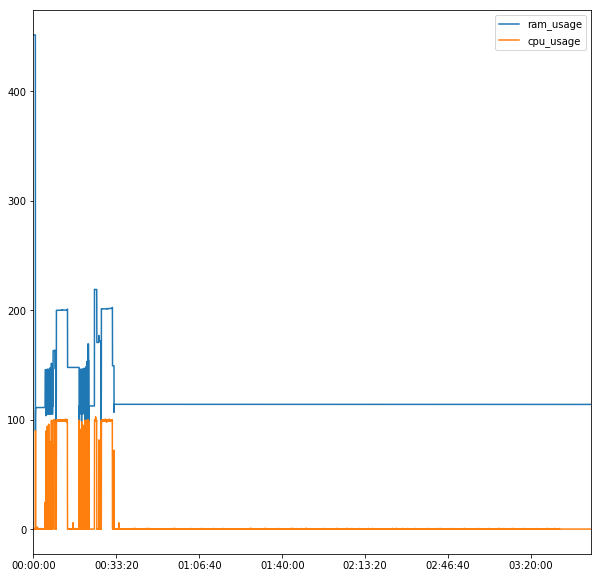

In [19]:
%matplotlib inline

stats_exp_2[["ram_usage", "cpu_usage"]].plot(figsize=(10,10))